## Project II: Implementing data science and statistical analysis on health data

Part 1: Exploratory Data Analysis 
Objective: Understand the data's characteristics and structure.
Tasks:
Visualizing the distribution of key variables using histograms, box plots, and scatter plots.
Summarizing data through measures of central tendency and variability.

Part 2: Advanced Statistical Analysis 
Objective: Dive deeper into the data's relationships.
Tasks:
Analyzing relationships between variables using covariance and correlation.
Identifying outliers and understanding their impact.

Part 3: Inferential Statistics 
Objective: Make inferences about the population.
Tasks:
Conducting hypothesis tests to compare different groups within the dataset.
Building confidence intervals for estimates.

Part 4: Statistical Machine Learning 
Objective: Predict outcomes using machine learning.
Tasks:
Splitting data into training and test sets.
Applying logistic regression to predict binary outcomes.
Evaluating model performance using accuracy, ROC curves, and confusion matrices.

Part 5: Advanced Topics 
Objective: Apply advanced statistical techniques.
Tasks:
Analyzing time series data if relevant (e.g., progression of a disease over time).
Exploring survival analysis for time-to-event data.

### Part 1: Exploratory Data Analysis (EDA)
**Here, we will examine the data to understand distributions and relationships.**

1. Visualizing the distribution of key variables using histograms, box plots, and scatter plots.
2. Summarizing data through measures of central tendency and variability.

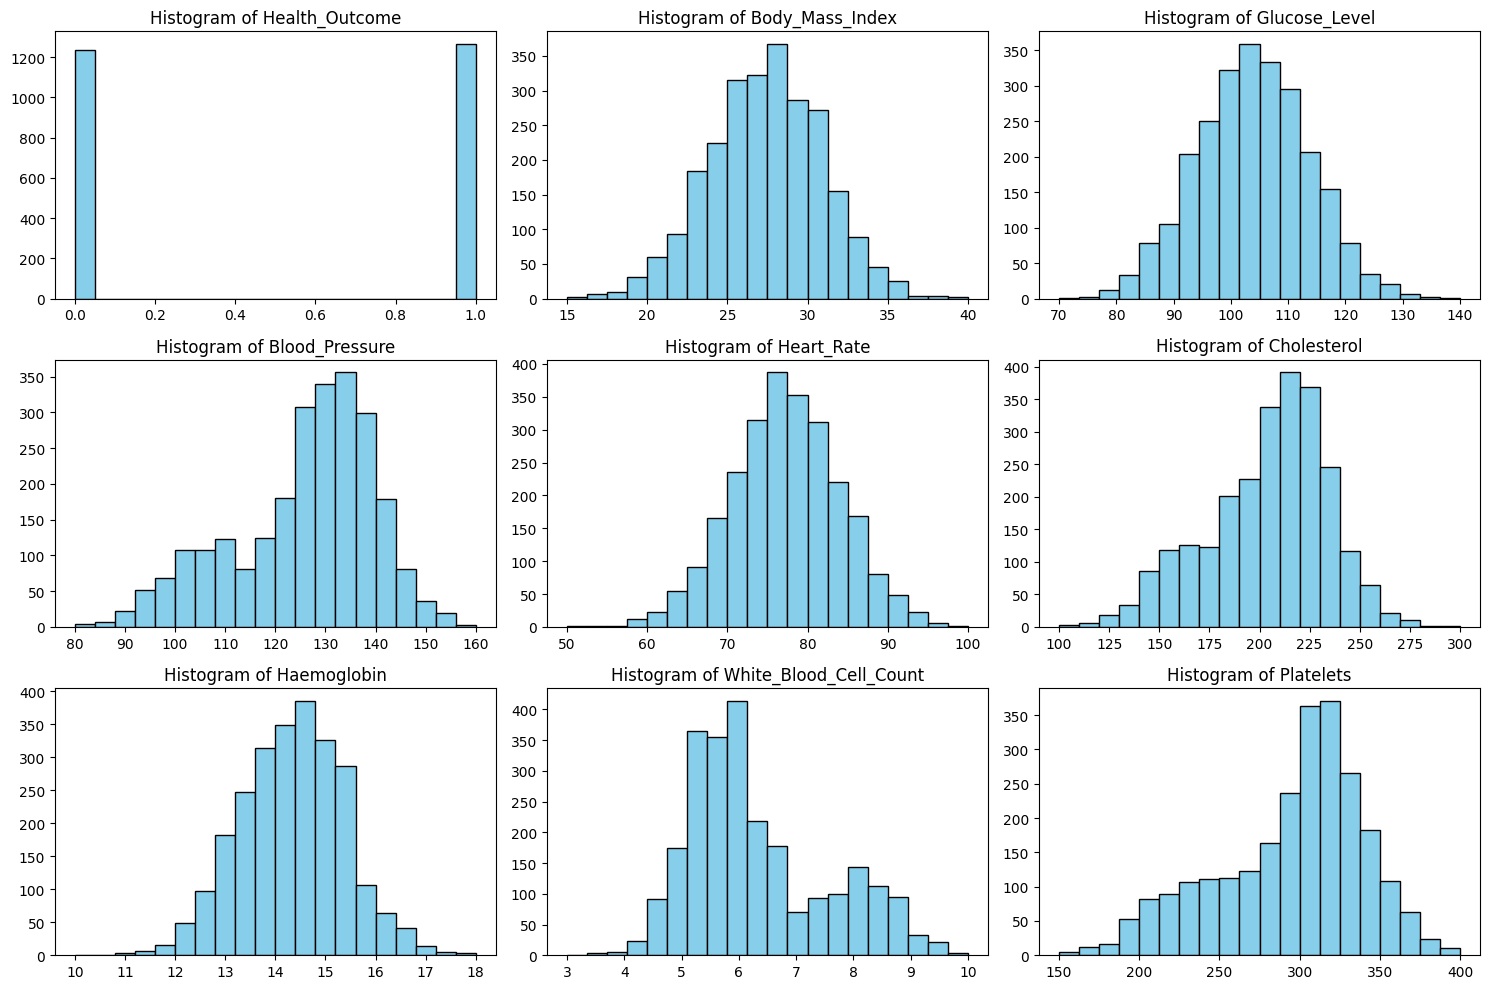

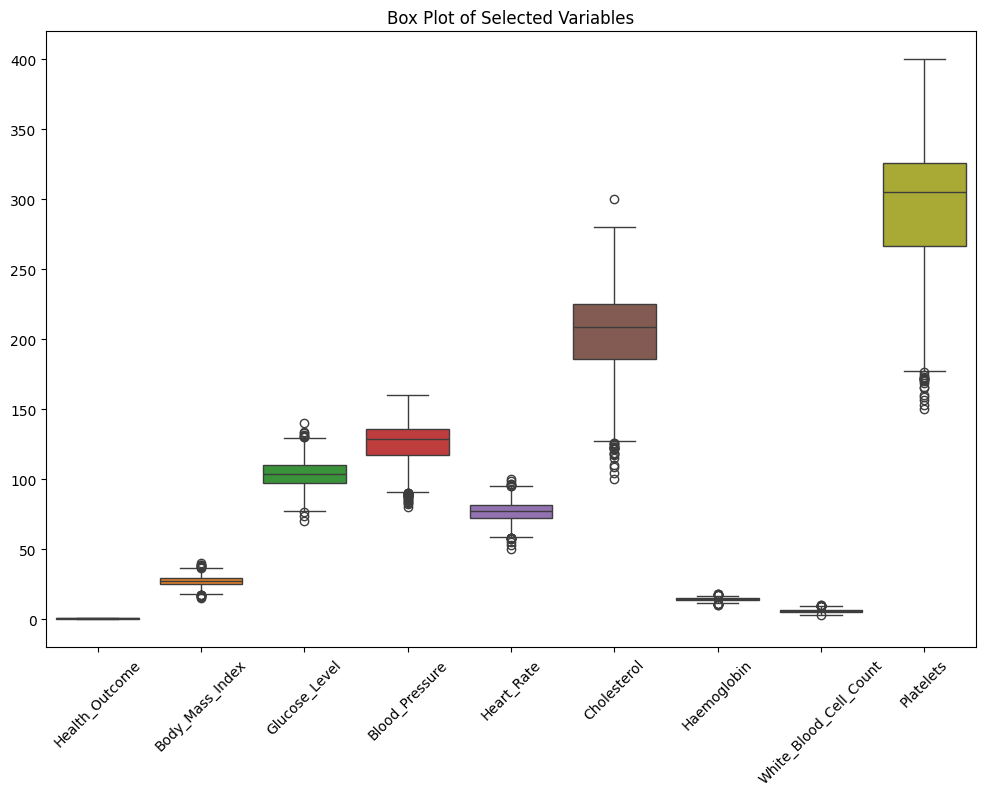

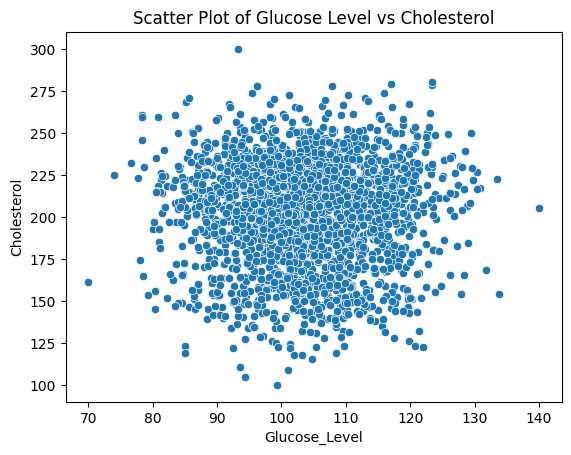

,Health_Outcome,Body_Mass_Index,Glucose_Level,Blood_Pressure,Heart_Rate,Cholesterol,Haemoglobin,White_Blood_Cell_Count,Platelets
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,0.506000,27.386360,103.778120,125.760120,77.287960,204.128280,14.297880,6.290240,294.893600
std,0.500064,3.508407,9.687728,14.084897,6.773203,30.023524,1.047151,1.226606,45.792266
min,0.000000,15.000000,70.000000,80.000000,50.000000,100.000000,10.000000,3.000000,150.000000
25%,0.000000,25.000000,97.175000,117.775000,72.700000,185.900000,13.600000,5.400000,266.675000
50%,1.000000,27.500000,103.750000,128.800000,77.300000,209.100000,14.300000,6.000000,305.300000
75%,1.000000,29.800000,110.400000,135.800000,81.800000,225.025000,15.000000,7.000000,326.150000
max,1.000000,40.000000,140.000000,160.000000,100.000000,300.000000,18.000000,10.000000,400.000000


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv(
    '/workspaces/Statistics-for-Data-Scientists-and-Analysts/notebooks/chapter11project/health/data/synthetic_health_data.csv')
# Define features for plots
features = ['Health_Outcome', 'Body_Mass_Index', 'Glucose_Level', 'Blood_Pressure',
            'Heart_Rate', 'Cholesterol', 'Haemoglobin', 'White_Blood_Cell_Count', 'Platelets']
# Plot histograms
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
for ax, feature in zip(axs.flatten(), features):
    ax.hist(data[feature], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram of {feature}')
plt.tight_layout()
plt.savefig('health_histograms.png', dpi=300, bbox_inches='tight')
plt.show()
# Plot box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[features])
plt.xticks(rotation=45)
plt.title('Box Plot of Selected Variables')
plt.savefig('health_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()
# Scatter plot of two variables
sns.scatterplot(x='Glucose_Level', y='Cholesterol', data=data)
plt.title('Scatter Plot of Glucose Level vs Cholesterol')
plt.savefig('health_scatterplot.png', dpi=300, bbox_inches='tight')
plt.show()
# Print descriptive statistics for the selected features
display(data[features].describe())

### Part 2: Advanced Statistical Analysis
**We'll dive deeper into the data's relationships.**
1. Analyzing relationships between variables using covariance and correlation.
2. Identifying outliers and understanding their impact.

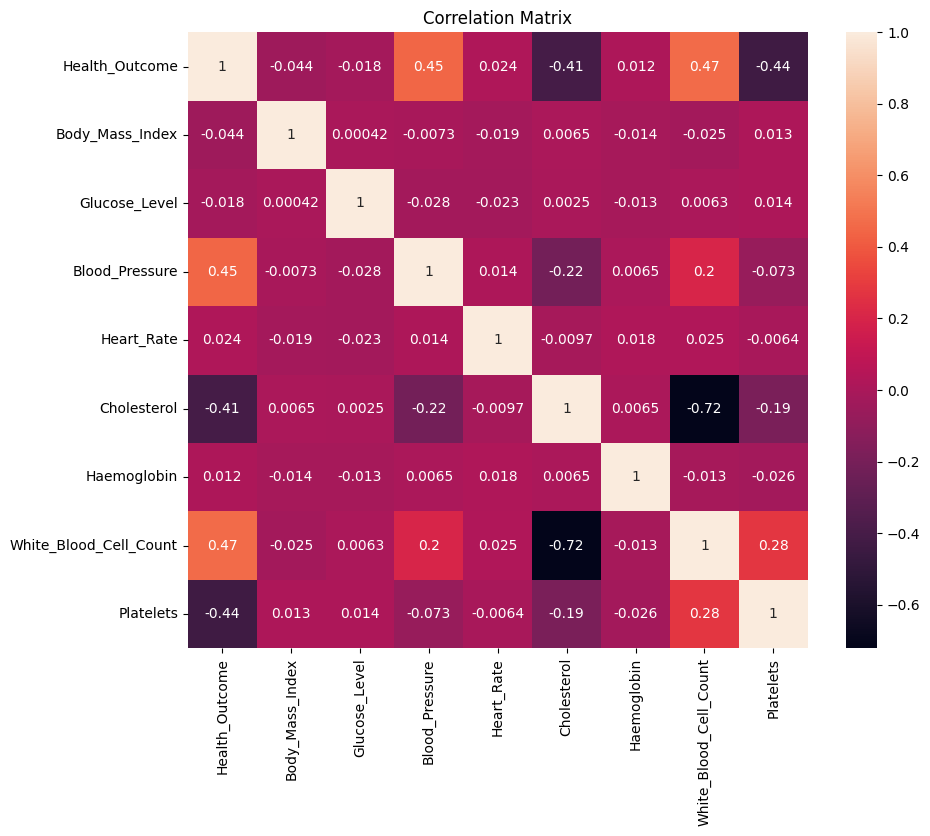

Covariance Matrix:


,Health_Outcome,Body_Mass_Index,Glucose_Level,Blood_Pressure,Heart_Rate,Cholesterol,Haemoglobin,White_Blood_Cell_Count,Platelets
Health_Outcome,0.250064,-0.078049,-0.089204,3.147278,0.081805,-6.178381,0.006355,0.285373,-10.006604
Body_Mass_Index,-0.078049,12.308918,0.014127,-0.359208,-0.458063,0.688701,-0.051642,-0.106960,2.045815
Glucose_Level,-0.089204,0.014127,93.852074,-3.812562,-1.491184,0.713124,-0.134108,0.074660,6.068815
Blood_Pressure,3.147278,-0.359208,-3.812562,198.384327,1.348735,-91.500516,0.095734,3.461163,-47.320419
Heart_Rate,0.081805,-0.458063,-1.491184,1.348735,45.876274,-1.965178,0.129926,0.208734,-1.994391
Cholesterol,-6.178381,0.688701,0.713124,-91.500516,-1.965178,901.411969,0.205814,-26.587635,-260.397566
Haemoglobin,0.006355,-0.051642,-0.134108,0.095734,0.129926,0.205814,1.096526,-0.016363,-1.228853
White_Blood_Cell_Count,0.285373,-0.106960,0.074660,3.461163,0.208734,-26.587635,-0.016363,1.504563,15.592294
Platelets,-10.006604,2.045815,6.068815,-47.320419,-1.994391,-260.397566,-1.228853,15.592294,2096.931588


Detected Outliers:
Empty DataFrame
Columns: [Patient_ID, Health_Outcome, Body_Mass_Index, Glucose_Level, Blood_Pressure, Heart_Rate, Cholesterol, Haemoglobin, White_Blood_Cell_Count, Platelets]
Index: []


In [3]:
# Select features for analysis
from scipy.stats import zscore
import numpy as np
# Select features for analysis
features = ['Health_Outcome', 'Body_Mass_Index', 'Glucose_Level', 'Blood_Pressure',
            'Heart_Rate', 'Cholesterol', 'Haemoglobin', 'White_Blood_Cell_Count', 'Platelets']
# Analyzing relationships between variables using covariance and correlation.
# Correlation matrix
correlation_matrix = data[features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.savefig('health_correlation.png', dpi=300, bbox_inches='tight')
plt.show()
# Covariance matrix
covariance_matrix = data[features].cov()
print("Covariance Matrix:")
display(covariance_matrix)
# Identifying outliers and understanding their impact.
# Z-score for outlier detection
z_scores = zscore(data)
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 1).all(axis=1)
data_outliers = data[outliers]
print("Detected Outliers:")
print(data_outliers)

### Part 3: Inferential Statistics
**Make inferences about the population**

1. Conducting hypothesis tests to compare different groups within the dataset.
2. Building confidence intervals for estimates.

In [3]:
# Conducting hypothesis tests to compare different groups within the dataset.
from scipy.stats import ttest_ind
# Building confidence intervals for estimates.
from scipy.stats import norm
# Apply T-test
group1 = data[data['Health_Outcome'] == 0]['Glucose_Level']
group2 = data[data['Health_Outcome'] == 1]['Glucose_Level']
t_stat, p_val = ttest_ind(group1, group2)
print(f"T-statistic: {t_stat}, P-value: {p_val}")
# Confidence interval for the mean of a column
ci_low, ci_upp = norm.interval(
    alpha=0.95, loc=data['Glucose_Level'].mean(), scale=data['Glucose_Level'].std())
print(
    f"95% confidence interval for the mean glucose level: ({ci_low}, {ci_upp})")

T-statistic: 0.9204677863057696, P-value: 0.3574172393450691
95% confidence interval for the mean glucose level: (84.79052199831503, 122.76571800168497)


/tmp/ipykernel_51316/367336875.py:11: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  ci_low, ci_upp = norm.interval(


### Part 4: Statistical Machine Learning
**Predict outcomes using machine learning.**

/home/codespace/.python/current/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9426666666666667
Confusion Matrix:
[[331  28]
 [ 15 376]]


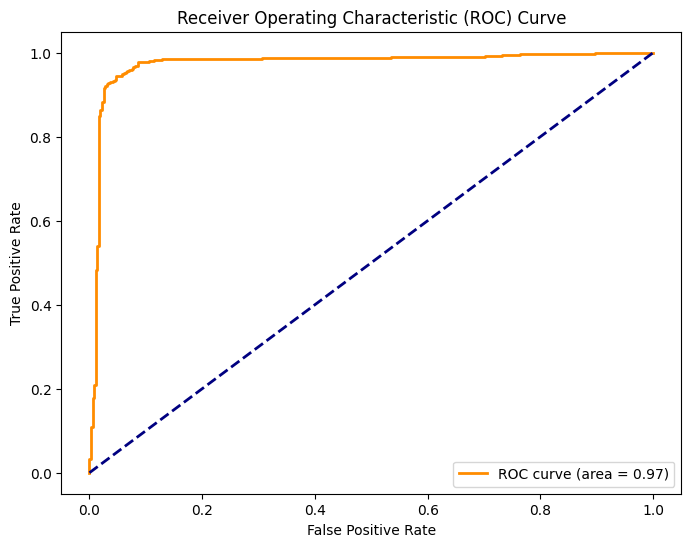

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

X = data.drop(['Health_Outcome', 'Patient_ID'], axis=1)
y = data['Health_Outcome']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
# Accuracy and confusion matrix
print("Accuracy:", model.score(X_test, y_test))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
# ROC Curve and AUC
probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig(
    'health_roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()